### Динамическое программирование

**Динамическое программирование** — метод решения задачи путём её разбиения на несколько одинаковых подзадач, рекуррентно связанных между собой. Самым простым примером будут числа Фибоначчи — чтобы вычислить некоторое число в этой последовательности, нам нужно сперва вычислить третье число, сложив первые два, затем четвёртое таким же образом на основе второго и третьего, и так далее (да, мы слышали про замкнутую формулу).

Решение задачи динамическим программированием должно содержать:

* Зависимость элементов динамики друг от друга. Такая зависимость может быть прямо дана в условии (так часто бывает, если это задача на числовые последовательности). В противном случае вы можете попытаться узнать какой-то известный числовой ряд (вроде тех же чисел Фибоначчи), вычислив первые несколько значений вручную.
* Значение начальных состояний. В результате долгого разбиения на подзадачи вам необходимо свести функцию либо к уже известным значениям (как в случае с Фибоначчи — заранее определены первые два члена), либо к задаче, решаемой элементарно.

Данный метод обладает рядом преимуществ:

*  **Скорость**. Благодаря этому динамическое программирование является эффективным. Сложнейшие задачи можно решить за максимально короткие сроки – достаточно лишь заполнить каждую ячейку таблицы.
* **Универсальность**. Для решения задачи любой сложности существует определенный набор правил, которые не предусматривают никаких исключений и требуют проведения минимальных расчетов.
* **Точность**. В процессе динамического программирования охватываются все возможные варианты событий. Это позволяет найти наиболее оптимальное решение без каких-либо погрешностей и неоднозначностей.

При этом у него есть и слабые стороны:
* **Память**. Перед тем как запустить алгоритм динамического программирования, нужно построить и заполнить таблицы, которые занимают определенный объем памяти. Возможно, что для решения задачи понадобится строить и размещать в памяти большие таблицы или множество различных таблиц.
* **Когнитивная нагрузка**. Безусловно, многих привлекает использование компактной системы правил для решения сложных задач. Но в то же время необходимо иметь соответствующий образ мышления, чтобы составлять подобные системы или хотя бы разбираться в них. Из-за этого динамическое программирование зачастую не пользуется большой популярностью.

Кроме исходных данных, для динамического решения задачи требуется следующее:

* Таблица для сохранения итогов промежуточных вычислений. При завершении работы среди них будет выбран окончательный результат.
* Набор правил, по которым заносятся данные в пустые ячейки таблицы, исходя из значений в уже заполненных ячейках. Общих рекомендаций здесь нет, для каждой задачи правила составляются индивидуально.
* Правило, по которому из заполненной таблицы получается готовый ответ.

**Уравнение Беллмана** (также известное как уравнение динамического программирования), названное в честь Ричарда Эрнста Беллмана, является достаточным условием для оптимальности, ассоциируемой с математическим методом оптимизации, называемым динамическим программированием и базируется на **Принципе оптимальности Беллмана**.

**Принцип оптимальности Беллмана** (также известный как принцип динамического программирования), названный в честь Р.Беллмана, описывает действие математического метода оптимизации, состоящий в том, что оптимальная стратегия имеет свойство, что какими бы ни были начальное состояние и начальное решение, последующие решения должны составлять оптимальный курс действий по отношения к состоянию, полученному в результате первого решения. Иными словами, оптимальная стратегия зависит только от текущего состояния и цели, и не зависит от предыстории.

### Нахождение N-го числа ряда Фибоначчи

Ряд Фибоначчи - элементы числовой последовательности, в которой первые два числа равны 0 и 1, а каждое последующее число равно сумме предыдущих чисел

$$F_{k} = F_{k-1} + F_{k-2},  где  F_{0} = 0, F_{1} = 1$$


In [98]:
import time

def rec(n):
    if n == 0 or n == 1:
        return n
    else:
        return rec(n-1) + rec(n-2)
    
def FibonacciVal(n):
    memo = [0, 1]
    for i in range(2, n+1):
        memo.append(memo[i-1] + memo[i-2])
    return memo[n]

In [126]:
N = 30

start_rec = time.time()
rec_n = rec(N)
end_rec = time.time() - start_rec

start_dp = time.time()
fib_n = FibonacciVal(N)
end_dp = time.time() - start_dp

print(f'Рекурсия. Значение {N}-го числа ряда Фибоначчи: {rec_n}. Время вычисления = {end_rec:.5f}',
      f'Дин.прог. Значение {N}-го числа ряда Фибоначчи: {fib_n}. Время вычисления = {end_dp:.5f}', sep='\n')

Рекурсия. Значение 30-го числа ряда Фибоначчи: 832040. Время вычисления = 0.37404
Дин.прог. Значение 30-го числа ряда Фибоначчи: 832040. Время вычисления = 0.00000


### Поиск максимальной общей подпоследовательности

Последовательность - это пронумерованный набор каких-либо объектов, среди которых допускаются повторения, причем порядо объектов имеет значение. 

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def les(A,B):
    F = [[0]*(len(B)+1) for i in range((len(A)+1))]
    list_les = []
    for i in range(1,len(A)+1):
        for j in range(1,len(B)+1):
            if A[i-1] == B[j-1]:
                F[i][j] = 1 + F[i-1][j-1]
                if B[j-1] not in list_les:
                    list_les.append(B[j-1])
            else:
                F[i][j] = max(F[i][j-1], F[i-1][j])
    return F, list_les

In [172]:
def plot_table(A, B, F, dist):
    item_list_A = [i for i in A]
    item_list_A.insert(0, '0')

    item_list_B = [i for i in B]
    item_list_B.insert(0, '0')

    plt.figure(figsize=(12,8))
    plt.title(f'Значение подпоследовательности (дистанция) {dist}', size=14)
    sns.heatmap(F, annot=True, square=True, cmap='coolwarm', linewidths=2, linecolor='black', 
               xticklabels=item_list_B, yticklabels=item_list_A)
    plt.show()

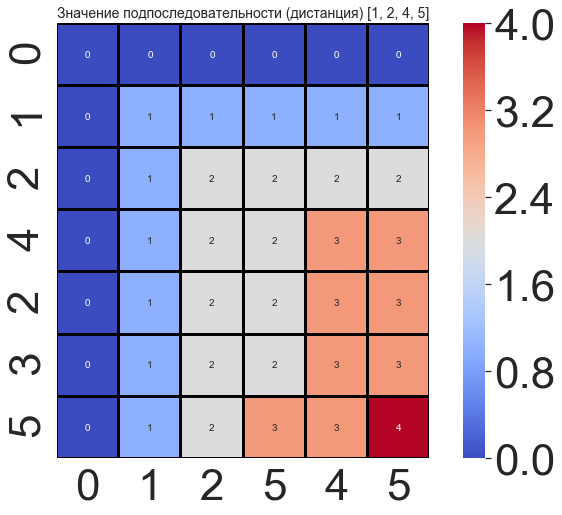

In [173]:
A = [1, 2, 4, 2, 3, 5]
B = [1, 2, 5, 4, 5]

F, list_les = les(A,B)
    
plot_table(A, B, F, list_les)

### Поиск максимальной возрастающей общей подпоследовательности

In [174]:
def gis(A):
    F = [0]*(len(A))
    for i in range(len(A)):
        m = 0
        for j in range(0, i):
            if A[i] > A[j] and F[j] > m:
                m = F[j]
        F[i] = m + 1
    return F[len(A)-1]

In [175]:
A = [5, 2, 1, 3]
gis(A)

2

### Расстояние Левенштейна

Расстояние Левенштейна (редакционное расстояние, дистанция редактирования) — метрика, измеряющая разность между двумя последовательностями символов (чем больше расстояние, тем более различны строки). Она определяется как минимальное количество односимвольных операций (а именно вставки, удаления, замены), необходимых для превращения одной последовательности символов в другую (для двух одинаковых последовательностей расстояние равно нулю). В общем случае, операциям, используемым в этом преобразовании, можно назначить разные цены. Широко используется в теории информации и компьютерной лингвистике.

In [176]:
def levenstein(A, B):
    F = [[(i+j) if i*j == 0 else 0 for j in range(len(B)+1)] for i in range(len(A)+1)]
    for i in range(1, len(A)+1):
        for j in range(1, len(B)+1):
            if A[i-1] == B[j-1]:
                F[i][j] = F[i-1][j-1]
            else:
                F[i][j] = 1 + min(F[i-1][j], F[i][j-1], F[i-1][j-1])
    return F, F[len(A)][len(B)]

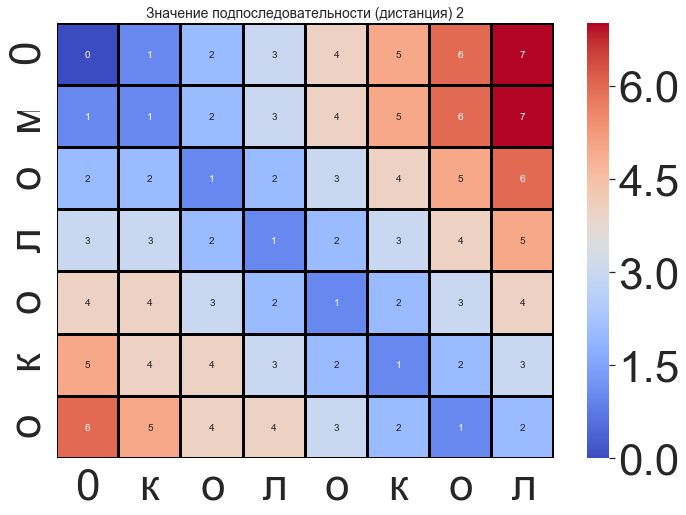

In [177]:
A = 'молоко'
B = 'колокол'

F, dist = levenstein(A, B)
    
plot_table(A, B, F, dist)

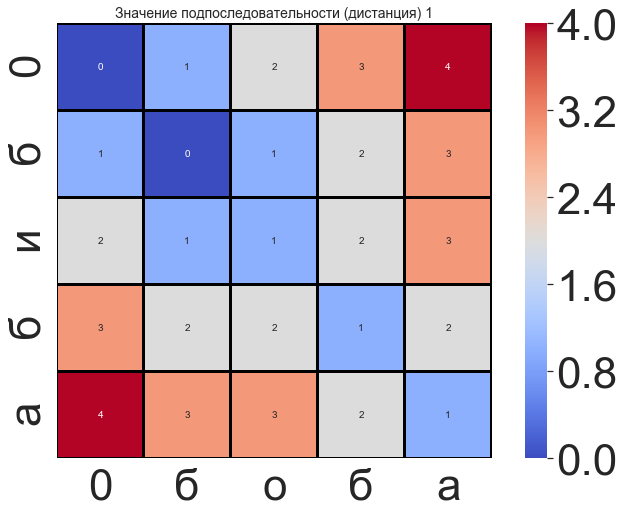

In [178]:
A = 'биба'
B = 'боба'

F, dist = levenstein(A, B)
    
plot_table(A, B, F, dist)

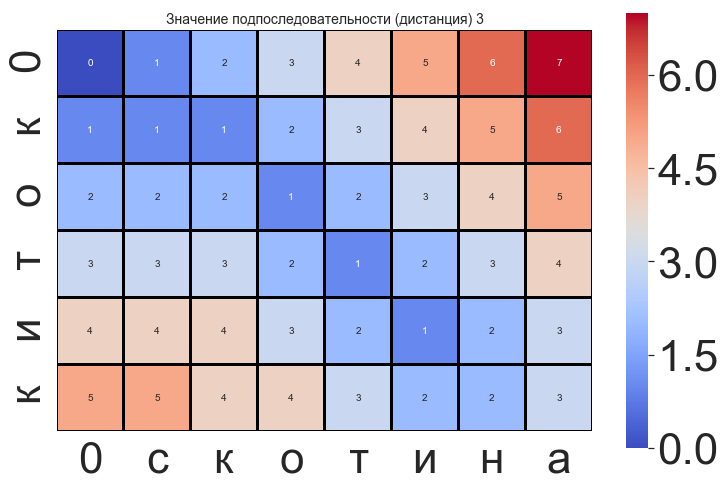

In [179]:
A = 'котик'
B = 'скотина'

F, dist = levenstein(A, B)
    
plot_table(A, B, F, dist)

### Задача о рюкзаке



In [238]:
# (вес, цена)
stuffdict = {'Телефон':(1,10), 
             'Микроволновка':(10,25), 
             'Палатка':(4,15),
             'Спальный мешок':(4,10),
             'Еда':(4,10),
             'Доп. одежда':(5,10),
             'Книга':(2,3),
             'Спички':(1,4),
             'Спрей от комаров':(2,5),
             'Столовые приборы':(2,4),
             'Телевизор':(10,20),
             'Ноутбук':(8,20),
             'Плита':(20,30),
             'Самовар':(10,10),
             'Игрушечный робот':(5,5),
             'Старые гамаши':(1,1),
             'Грязная посуда':(1,2),
             'Стиральная машина':(15,20),
             'Набор пластинок':(6,15),
             'Толстый кот':(2,10),
            }

In [239]:
def get_area_and_value(stuffdict):
    # Разделяем списки значений исходного словаря
    area = [stuffdict[item][0] for item in stuffdict]
    value = [stuffdict[item][1] for item in stuffdict]        
    return area, value

In [240]:
def get_memtable(stuffdict, A):
    area, value = get_area_and_value(stuffdict)
    n = len(value) # находим размеры таблицы
    # создаём таблицу из нулевых значений
    V = [[0 for a in range(A+1)] for i in range(n+1)]
    for i in range(n+1):
        for a in range(A+1):
            # базовый случай
            if i == 0 or a == 0:
                V[i][a] = 0               
            # если площадь предмета меньше площади столбца,
            # максимизируем значение суммарной ценности
            elif area[i-1] <= a:
                V[i][a] = max(value[i-1] + V[i-1][a-area[i-1]], V[i-1][a])
            # если площадь предмета больше площади столбца,
            # забираем значение ячейки из предыдущей строки
            else:
                V[i][a] = V[i-1][a]       
    return V, area, value

In [241]:
def get_selected_items_list(stuffdict, A):
    V, area, value = get_memtable(stuffdict, A)
    n = len(value)
    res = V[n][A]      # начинаем с последнего элемента таблицы
    a = A              # начальная площадь - максимальная
    items_list = []    # список площадей и ценностей
    
    for i in range(n, 0, -1):  # идём в обратном порядке
        if res <= 0:  # условие прерывания - собрали "рюкзак" 
            break
        if res == V[i-1][a]:  # ничего не делаем, двигаемся дальше
            continue
        else:
            # "забираем" предмет
            items_list.append((area[i-1], value[i-1]))
            res -= value[i-1]   # отнимаем значение ценности от общей
            a -= area[i-1]  # отнимаем площадь от общей
            
    selected_stuff = []
    # находим ключи исходного словаря - названия предметов
    for search in items_list:
        for key, value in stuffdict.items():
            if value == search:
                selected_stuff.append(key)
            
    return selected_stuff, V

In [242]:
stuff, V = get_selected_items_list(stuffdict, A=20)

Собранные предметы:
			 Толстый кот.
			 Спрей от комаров.
			 Спички.
			 Палатка.
			 Микроволновка.
			 Телефон.
Их ценность 69


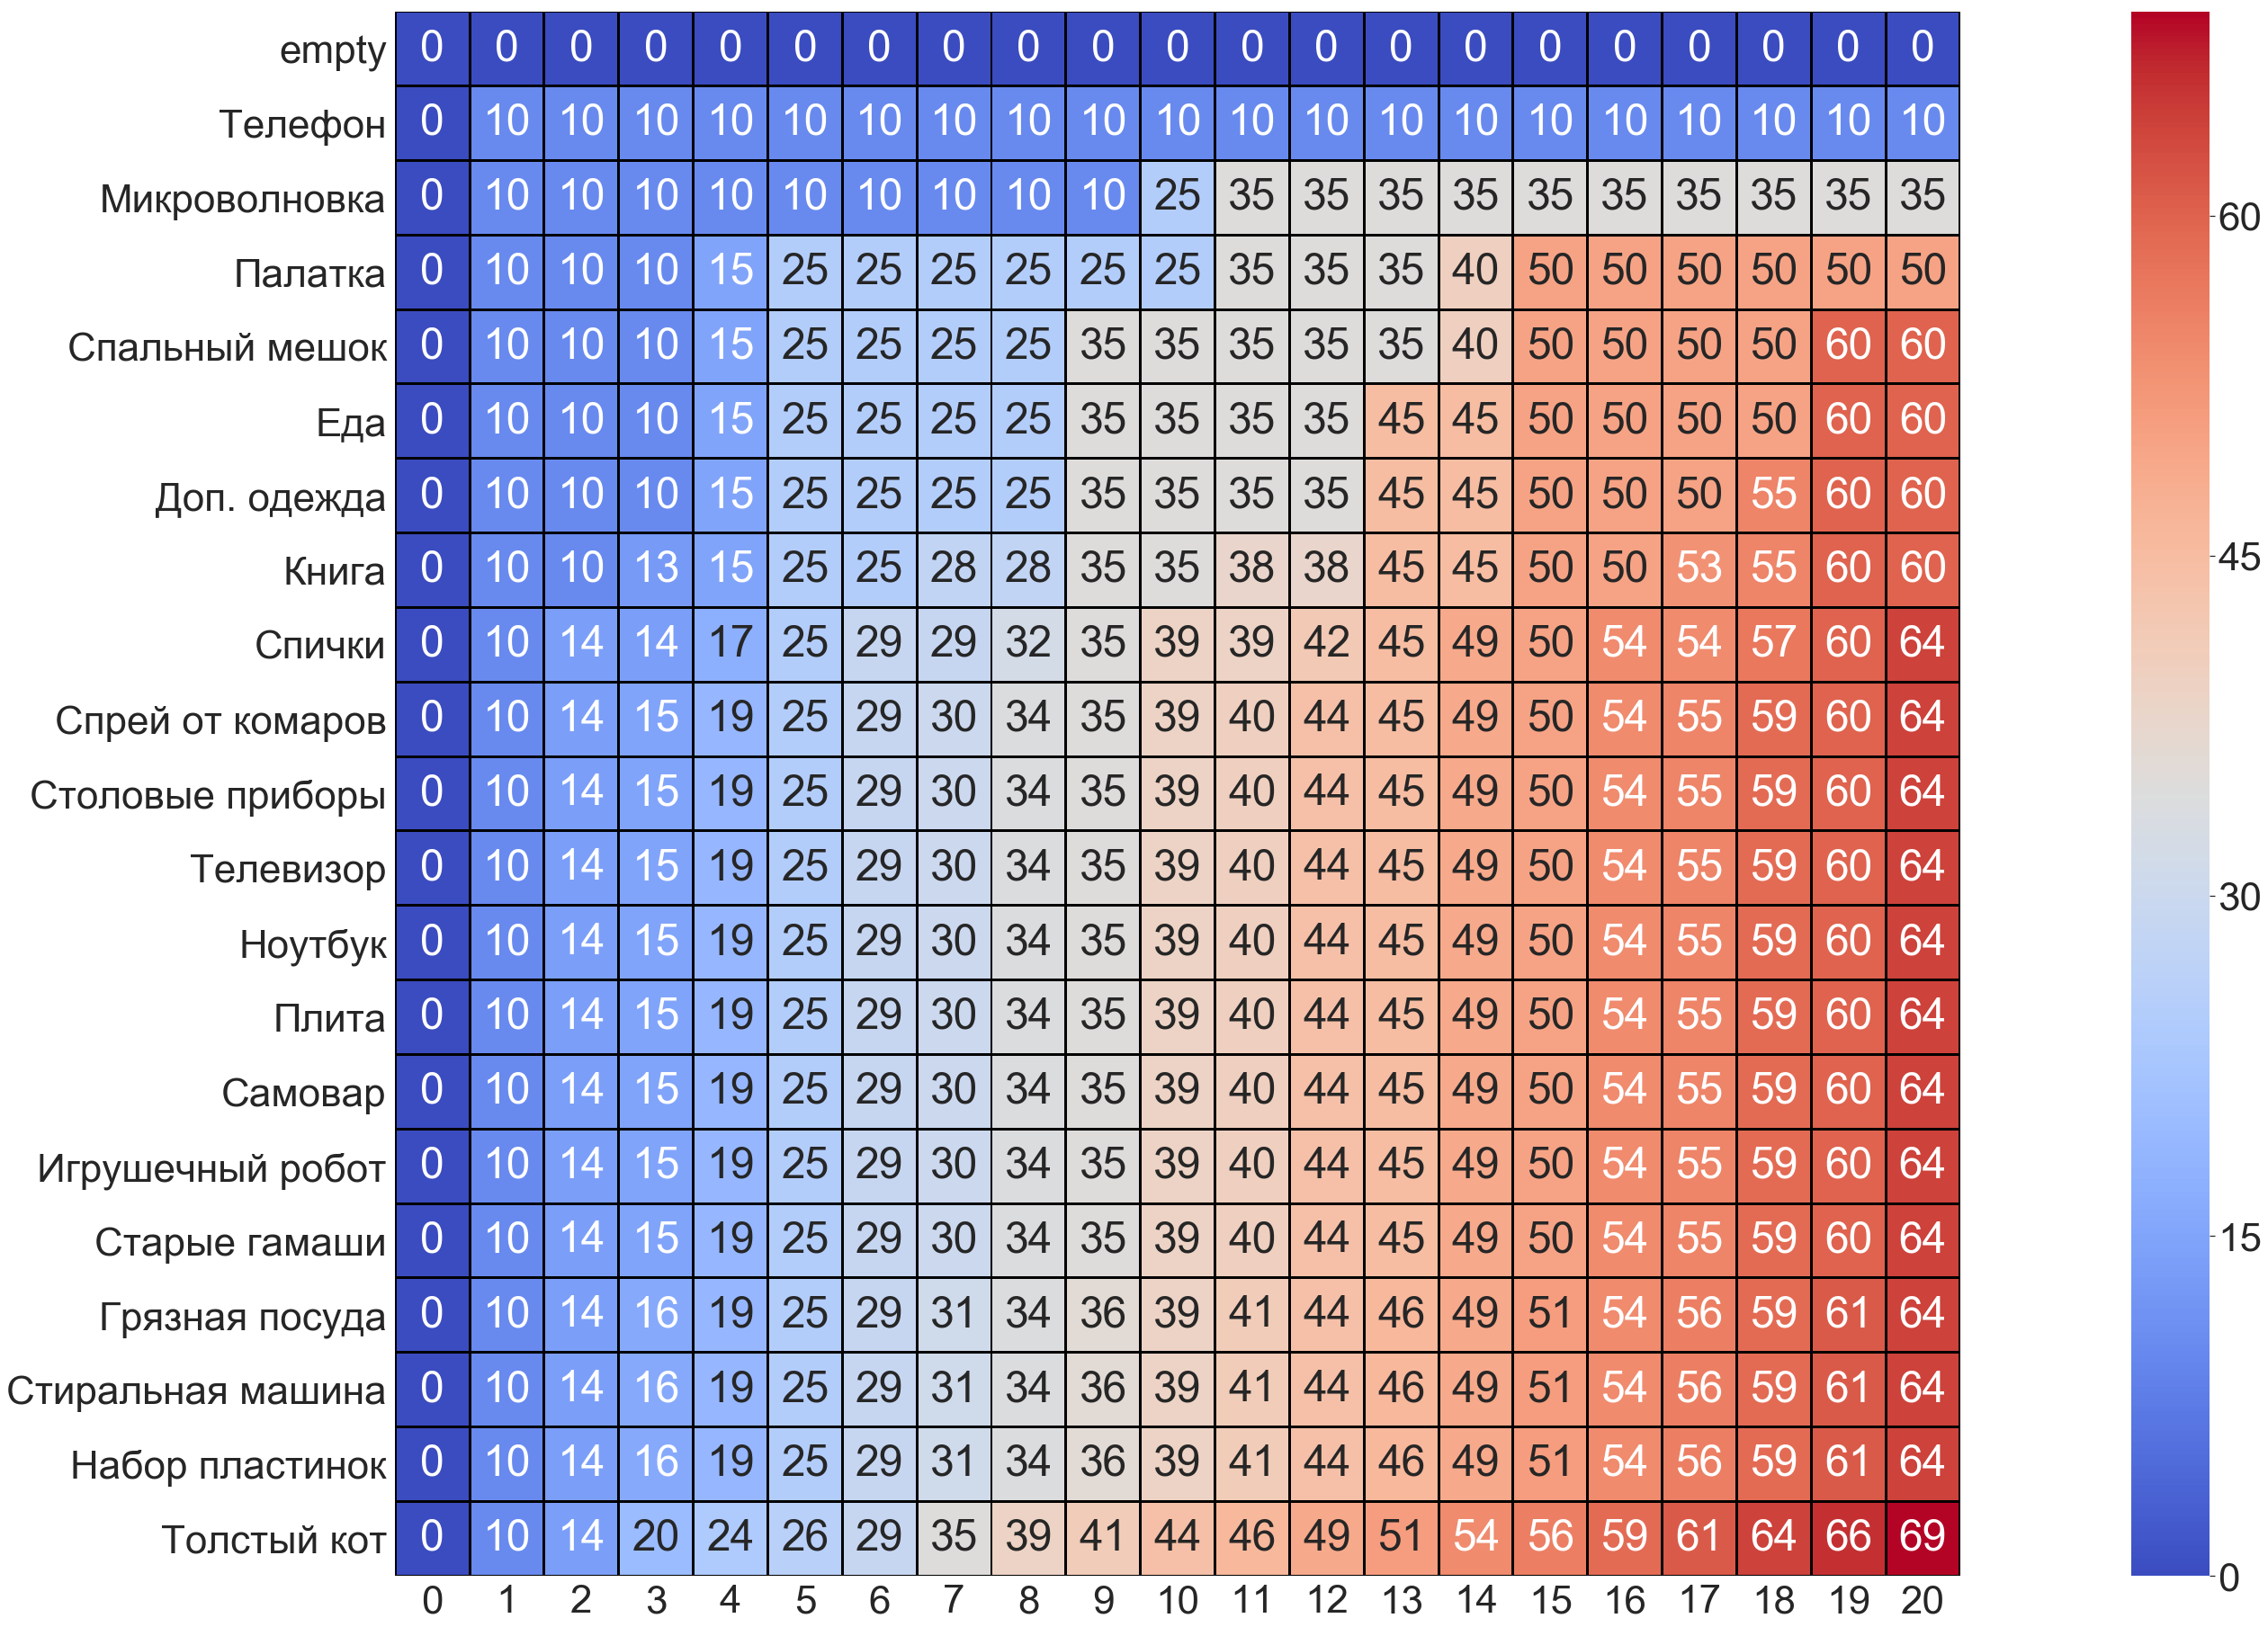

In [243]:
print(f'Собранные предметы:')
for object in stuff:
    print(f'\t\t\t {object}.', sep='\n')
    
print(f'Их ценность {V[-1][-1]}')

plt.figure(figsize=(68,32))
item_list = list(stuffdict.keys())
item_list.insert(0, 'empty')
sns.set(font_scale=4)
sns.heatmap(V, annot=True, square=True, cmap='coolwarm', linewidths=2, linecolor='black', yticklabels=item_list)
plt.show()